# **`Import Libraries`**

In [ ]:
import numpy as np          
import pandas as pd              
import matplotlib.pyplot as plt  
from IPython import display
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
# configure notebook to display plots
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Load Data

In [ ]:
df = pd.read_csv(r'/gdrive/MyDrive/MSCDiss/cars_news_data2.csv')
df

ID        admin_date        disch_date  died  male  age       los  \
0         1  01/05/2020 13:00  01/07/2020 13:45     0     0   79  2.031313   
1         1  01/05/2020 13:00  01/07/2020 13:45     0     0   79  2.031313   
2         1  01/05/2020 13:00  01/07/2020 13:45     0     0   79  2.031313   
3         1  01/05/2020 13:00  01/07/2020 13:45     0     0   79  2.031313   
4         1  01/05/2020 13:00  01/07/2020 13:45     0     0   79  2.031313   
...     ...               ...               ...   ...   ...  ...       ...   
86958  2860  01/02/2020 02:04  01/03/2020 16:59     0     1   83  1.621713   
86959  2861  01/06/2020 04:07  01/06/2020 11:54     0     0   69  0.324646   
86960  2861  01/06/2020 04:07  01/06/2020 11:54     0     0   69  0.324646   
86961  2861  01/06/2020 04:07  01/06/2020 11:54     0     0   69  0.324646   
86962  2861  01/06/2020 04:07  01/06/2020 11:54     0     0   69  0.324646   

              news_date  NEWS2  syst  ...  cnsresponse  resp  o2_scale  \
0      01/05/2020 13:32      1   142  ...        Alert    18         1   
1      01/05/2020 17:15      3   121  ...        Alert    18         1   
2      01/05/2020 18:36      2   123  ...        Alert    15         1   
3      01/05/2020 23:11      1   126  ...        Alert    18         1   
4      01/06/2020 02:26      0   138  ...        Alert    17         1   
...                 ...    ...   ...  ...          ...   ...       ...   
86958  01/03/2020 09:09      0   172  ...        Alert    17         1   
86959  01/06/2020 02:25      1   127  ...        Alert    17         1   
86960  01/06/2020 03:30      1   142  ...        Alert    17         1   
86961  01/06/2020 04:26      1   163  ...        Alert    16         1   
86962  01/06/2020 07:28      0   159  ...        Alert    15         1   

       o2_flow_rate  alert NEWS1      CARS  subindex_n  submax_n  \
0               0.0      0     1  0.030235           1        13   
1               0.0      0     3  0.049313           2        13   
2               0.0      0     2  0.036648           3        13   
3               0.0      0     1  0.034234           4        13   
4               0.0      0     0  0.022482           5        13   
...             ...    ...   ...       ...         ...       ...   
86958           0.0      0     0  0.023553          35        35   
86959           0.0      0     0  0.018063           1         4   
86960           0.0      0     0  0.015498           2         4   
86961           0.0      0     0  0.009996           3         4   
86962           0.0      0     0  0.006620           4         4   

                hosp  
0      York Hospital  
1      York Hospital  
2      York Hospital  
3      York Hospital  
4      York Hospital  
...              ...  
86958  York Hospital  
86959  York Hospital  
86960  York Hospital  
86961  York Hospital  
86962  York Hospital  

[86963 rows x 25 columns]

# DATA ANALYSIS AND VISUALIZATION


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86963 entries, 0 to 86962
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            86963 non-null  int64  
 1   admin_date    86900 non-null  object 
 2   disch_date    86963 non-null  object 
 3   died          86963 non-null  int64  
 4   male          86963 non-null  int64  
 5   age           86963 non-null  int64  
 6   los           86900 non-null  float64
 7   news_date     86911 non-null  object 
 8   NEWS2         86963 non-null  int64  
 9   syst          86963 non-null  int64  
 10  dias          86963 non-null  int64  
 11  temp          86963 non-null  float64
 12  pulse         86963 non-null  int64  
 13  sat           86963 non-null  int64  
 14  sup           86963 non-null  int64  
 15  cnsresponse   86963 non-null  object 
 16  resp          86963 non-null  int64  
 17  o2_scale      86963 non-null  int64  
 18  o2_flow_rate  86963 non-nu

In [ ]:
df['news_date'] = pd.to_datetime(df['news_date'])
df['news_date'] = df['news_date'].dt.hour

In [ ]:
df = df.rename(columns={'male': 'gender'})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["cnsresponse1"] = le.fit_transform(df["cnsresponse"])
data= df.drop('cnsresponse',axis= 'columns' )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86963 entries, 0 to 86962
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            86963 non-null  int64  
 1   admin_date    86900 non-null  object 
 2   disch_date    86963 non-null  object 
 3   died          86963 non-null  int64  
 4   gender        86963 non-null  int64  
 5   age           86963 non-null  int64  
 6   los           86900 non-null  float64
 7   news_date     86911 non-null  float64
 8   NEWS2         86963 non-null  int64  
 9   syst          86963 non-null  int64  
 10  dias          86963 non-null  int64  
 11  temp          86963 non-null  float64
 12  pulse         86963 non-null  int64  
 13  sat           86963 non-null  int64  
 14  sup           86963 non-null  int64  
 15  resp          86963 non-null  int64  
 16  o2_scale      86963 non-null  int64  
 17  o2_flow_rate  86963 non-null  float64
 18  alert         86963 non-nu

In [ ]:
data[['died','gender','age','los','news_date','NEWS2','NEWS1','CARS','subindex_n',	'submax_n']].describe()

died        gender           age           los     news_date  \
count  86963.000000  86963.000000  86963.000000  86900.000000  86911.000000   
mean       0.088267      0.480756     73.421202     16.403077     12.434226   
std        0.283685      0.499632     16.395192     18.675198      6.607229   
min        0.000000      0.000000     18.000000      0.000000      0.000000   
25%        0.000000      0.000000     65.000000      4.751360      6.000000   
50%        0.000000      0.000000     77.000000      9.749997     12.000000   
75%        0.000000      1.000000     85.000000     20.818299     18.000000   
max        1.000000      1.000000    103.000000    123.781120     23.000000   

              NEWS2         NEWS1          CARS    subindex_n      submax_n  
count  86963.000000  86963.000000  86963.000000  86963.000000  86963.000000  
mean       1.779952      1.120764      0.056011     35.928659     70.857319  
std        2.100281      1.646874      0.074823     45.491623     70.381168  
min        0.000000      0.000000      0.000243      1.000000      1.000000  
25%        0.000000      0.000000      0.015914      9.000000     26.000000  
50%        1.000000      0.000000      0.033811     20.000000     46.000000  
75%        3.000000      2.000000      0.065657     44.000000     87.000000  
max       18.000000     15.000000      0.931999    411.000000    411.000000

In [ ]:
data[['syst','dias','temp','pulse','sat','sup','resp','o2_scale','o2_flow_rate',	'cnsresponse1']].describe()

syst          dias          temp         pulse           sat  \
count  86963.000000  86963.000000  86963.000000  86963.000000  86963.000000   
mean     132.753056     71.474133     36.493023     82.217966     95.738142   
std       25.571737     13.487321      0.426918     17.117395      2.770374   
min       50.000000     10.000000     31.600000     30.000000     60.000000   
25%      114.000000     61.000000     36.299999     70.000000     95.000000   
50%      130.000000     70.000000     36.400002     81.000000     96.000000   
75%      147.000000     80.000000     36.700001     92.000000     97.000000   
max      280.000000    208.000000     41.500000    200.000000    100.000000   

                sup          resp      o2_scale  o2_flow_rate  cnsresponse1  
count  86963.000000  86963.000000  86963.000000  86963.000000  86963.000000  
mean       0.208537     18.180640      1.132045      1.085008      0.145867  
std        0.406265      3.290713      0.338541      4.778212      0.518740  
min        0.000000      1.000000      1.000000      0.000000      0.000000  
25%        0.000000     16.000000      1.000000      0.000000      0.000000  
50%        0.000000     18.000000      1.000000      0.000000      0.000000  
75%        0.000000     19.000000      1.000000      0.000000      0.000000  
max        1.000000     60.000000      2.000000     60.000000      5.000000

In [ ]:
data.isnull().sum()

ID               0
admin_date      63
disch_date       0
died             0
gender           0
age              0
los             63
news_date       52
NEWS2            0
syst             0
dias             0
temp             0
pulse            0
sat              0
sup              0
resp             0
o2_scale         0
o2_flow_rate     0
alert            0
NEWS1            0
CARS             0
subindex_n       0
submax_n         0
hosp             0
cnsresponse1     0
dtype: int64

In [ ]:
data= data.fillna(0)
data.isnull().sum()

ID              0
admin_date      0
disch_date      0
died            0
gender          0
age             0
los             0
news_date       0
NEWS2           0
syst            0
dias            0
temp            0
pulse           0
sat             0
sup             0
resp            0
o2_scale        0
o2_flow_rate    0
alert           0
NEWS1           0
CARS            0
subindex_n      0
submax_n        0
hosp            0
cnsresponse1    0
dtype: int64

In [ ]:
data['los'] = data['los'].astype(int)

In [ ]:
data['news_date'] = data['news_date'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86963 entries, 0 to 86962
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            86963 non-null  int64  
 1   admin_date    86963 non-null  object 
 2   disch_date    86963 non-null  object 
 3   died          86963 non-null  int64  
 4   gender        86963 non-null  int64  
 5   age           86963 non-null  int64  
 6   los           86963 non-null  int64  
 7   news_date     86963 non-null  int64  
 8   NEWS2         86963 non-null  int64  
 9   syst          86963 non-null  int64  
 10  dias          86963 non-null  int64  
 11  temp          86963 non-null  float64
 12  pulse         86963 non-null  int64  
 13  sat           86963 non-null  int64  
 14  sup           86963 non-null  int64  
 15  resp          86963 non-null  int64  
 16  o2_scale      86963 non-null  int64  
 17  o2_flow_rate  86963 non-null  float64
 18  alert         86963 non-nu

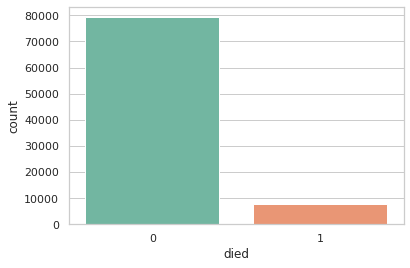

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='died', data=data, palette='Set2')
plt.show()

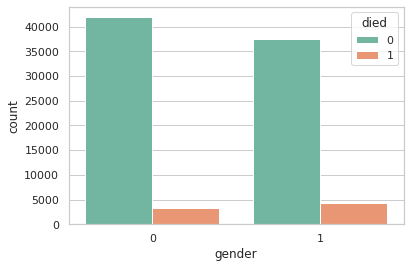

In [ ]:
sns.countplot(x='gender', hue="died", data=df, palette='Set2')

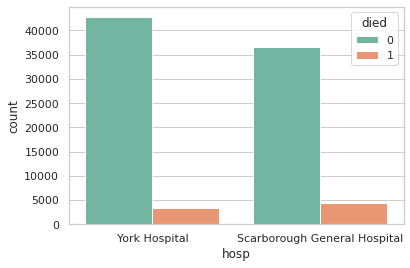

In [ ]:
sns.countplot(x='hosp', hue="died", data=df, palette='Set2')

In [ ]:
x=data.drop(['admin_date','disch_date',	'died','hosp'],axis='columns')
y=data.died

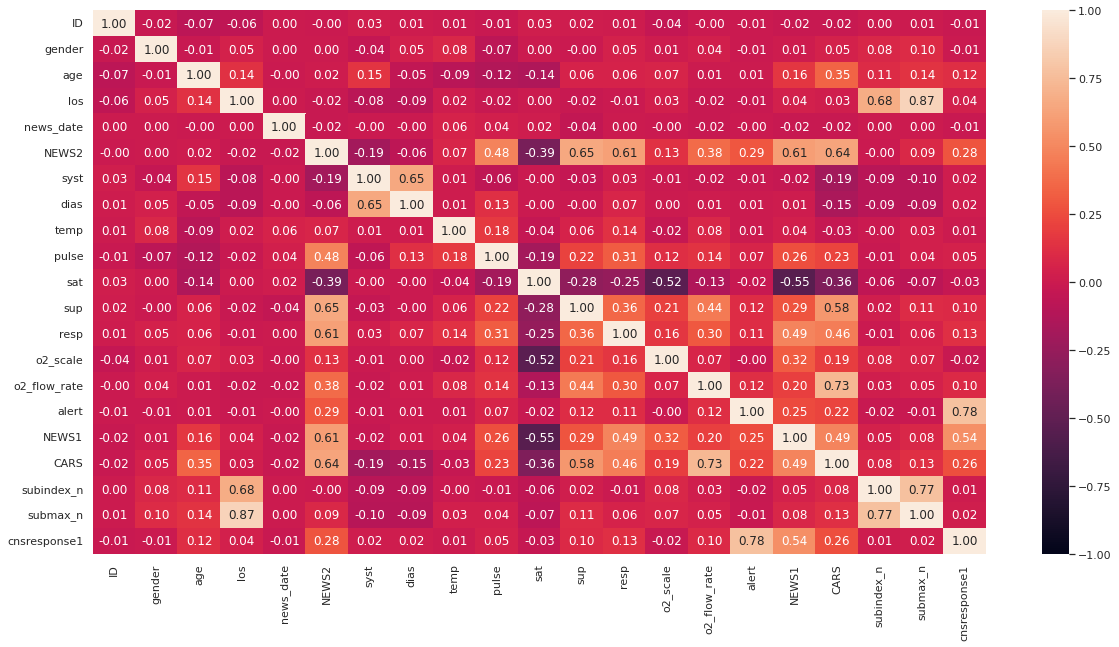

In [ ]:

import seaborn as sns
corr = x.corr()
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True,fmt = ".2f", vmin = -1.00, vmax = 1.00)

In [ ]:
var1=['age','syst','dias','temp','pulse','sat','resp','NEWS1','NEWS2']
variables = var1.copy()
variables.append('died')

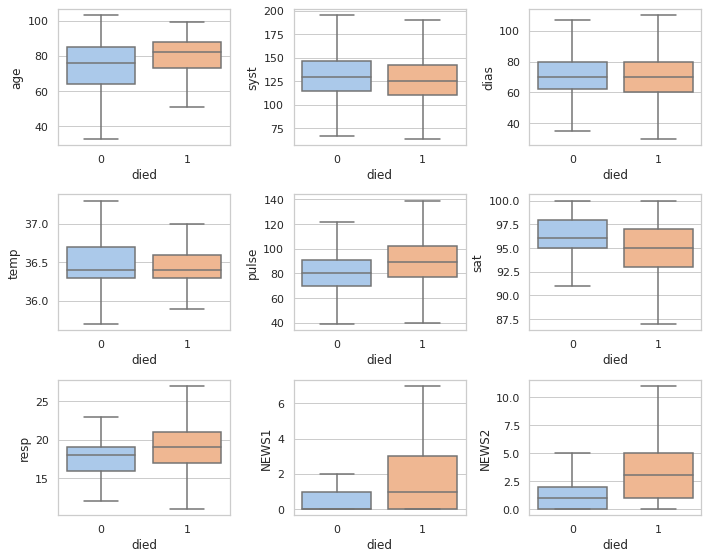

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
count = 0
for variable in var1:
    count += 1
    plt.subplot(4, 3, count)
    
    ax = sns.boxplot(x = 'died', y=variable, data=df,showfliers = False, palette='pastel')


fig.tight_layout()
plt.show()

# Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

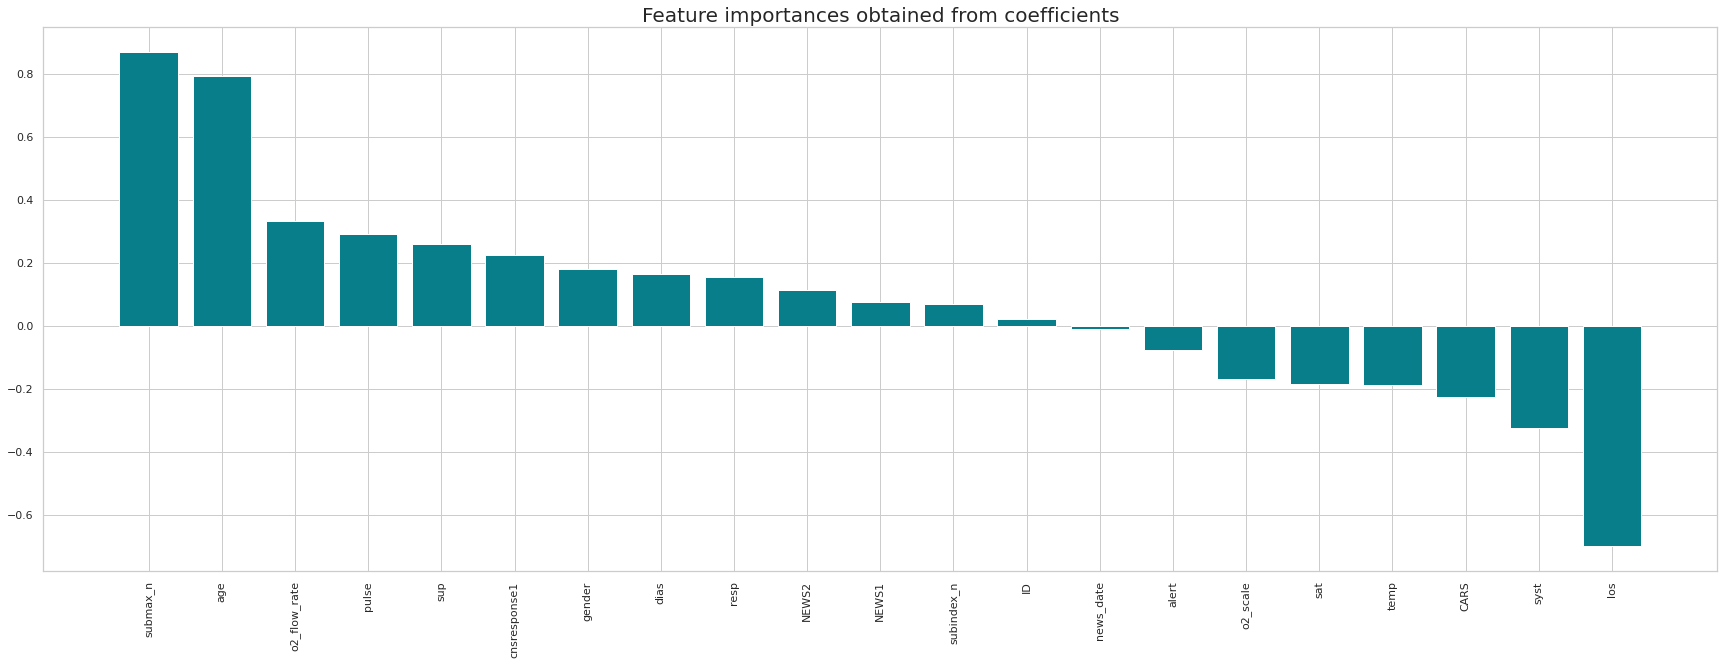

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.6, k_neighbors=5, n_jobs=None)
X, y1 = oversample.fit_resample(x, y)

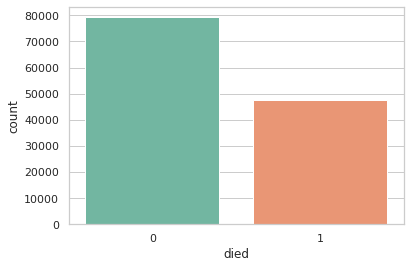

In [ ]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x=y1, data=X, palette='Set2')
plt.show()

In [ ]:
from collections import Counter
counter = Counter(y1)
print(counter)

Counter({0: 79287, 1: 47572})
